<a href="https://colab.research.google.com/github/BKV15/AI_Utech/blob/main/Deep%20Learning/Exercise_2/E2-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2 - 1 : Cifar10 classification with convultional neural network

## `Importing libraries`

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

## `Loading Cifar10 dataset`

In [2]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = cifar10.load_data()

## ` Sample Picture`

[8]


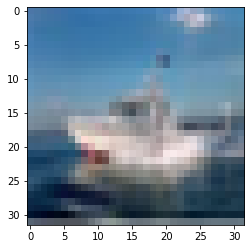

In [3]:
sample = 62
plt.imshow(x_train_raw[sample])
print(y_train_raw[sample])

## ` Question 1 :`
Normalizing images channel values to be between 0-1


In [4]:
x_train = x_train_raw.astype('float32')
x_train[:,:,:] /= 255. 
x_test = x_test_raw.astype('float32')
x_test[:,:,:] /= 255. 

## ` Question 2 :`
Labels need to be in OneHotEncoded format

In [6]:
y_train_raw[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [7]:
y_train = keras.utils.to_categorical(y_train_raw , num_classes=10)
y_test =  keras.utils.to_categorical(y_test_raw , num_classes=10)

In [8]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## ` Question 3 :`
Build a convultional neural network with this architecture :
* A convultional layer with `32` `3x3` filter and ReLU activation function
* A pooling layer with size `2x2`
* A convultional layer with `32` `3x3` filter and ReLU activation function
* A pooling layer with size `2x2`
* A convultional layer with `64` `3x3` filter and ReLU activation function
* A pooling layer with size `2x2`
* A flatten layer. why ?
* A dropout layer with `0.5` rate
* A softmax layer ? How many neuron do think this layer need to calculate output probablites ?

In [28]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , activation='relu' , input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32 , (3,3) , activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64 , (3,3) , activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10 , activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 64)        

## ` Question 4 :`
Compile the model


In [29]:
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)
model.compile(optimizer=opt_rms , loss='categorical_crossentropy' , metrics=['accuracy'])

## ` Question 5 :`
Train the model with batch size of `64` for `25` epoch. Use test sets for validation

In [30]:
model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=25,
    validation_data=(x_test,y_test)
)

Epoch 1/25
782/782 [==============================] - 18s 11ms/step - loss: 1.8288 - accuracy: 0.3254 - val_loss: 1.5440 - val_accuracy: 0.4386
Epoch 2/25
782/782 [==============================] - 8s 10ms/step - loss: 1.5276 - accuracy: 0.4460 - val_loss: 1.6752 - val_accuracy: 0.4154
Epoch 3/25
782/782 [==============================] - 9s 11ms/step - loss: 1.4081 - accuracy: 0.4938 - val_loss: 1.5199 - val_accuracy: 0.4558
Epoch 4/25
782/782 [==============================] - 8s 10ms/step - loss: 1.3172 - accuracy: 0.5303 - val_loss: 1.2316 - val_accuracy: 0.5786
Epoch 5/25
782/782 [==============================] - 8s 10ms/step - loss: 1.2603 - accuracy: 0.5519 - val_loss: 1.2978 - val_accuracy: 0.5518
Epoch 6/25
782/782 [==============================] - 8s 10ms/step - loss: 1.2160 - accuracy: 0.5704 - val_loss: 1.1709 - val_accuracy: 0.5843
Epoch 7/25
782/782 [==============================] - 8s 10ms/step - loss: 1.1741 - accuracy: 0.5831 - val_loss: 1.2624 - val_accuracy: 0.565

In [31]:
loss , acc = model.evaluate(x_test , y_test)
print(f'Test accuracy : {acc:.2f} , Test loss : {loss:.2f}')

313/313 [==============================] - 2s 5ms/step - loss: 0.8884 - accuracy: 0.6918
Test accuracy : 0.69 , Test loss : 0.89


## ` Question 6 :`
Change parameter or hyperparameter of this model in way to increase it accuracy


In [9]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , activation='relu' , padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32 , (3,3) , activation='relu' , padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64 , (3,3) , activation='relu' , padding='same'))
model.add(Conv2D(64 , (3,3) , activation='relu' , padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128 , (3,3) , activation='relu' , padding='same'))
model.add(Conv2D(128 , (3,3) , activation='relu' , padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10 , activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [10]:
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001 , decay=1e-6)
model.compile(optimizer=opt_rms , loss='categorical_crossentropy' , metrics=['accuracy'])

In [11]:
model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_data=(x_test,y_test)
)

Epoch 1/30
782/782 [==============================] - 22s 23ms/step - loss: 1.7790 - accuracy: 0.3526 - val_loss: 1.7227 - val_accuracy: 0.4140
Epoch 2/30
782/782 [==============================] - 18s 23ms/step - loss: 1.2463 - accuracy: 0.5616 - val_loss: 1.2447 - val_accuracy: 0.5615
Epoch 3/30
782/782 [==============================] - 18s 23ms/step - loss: 0.9982 - accuracy: 0.6533 - val_loss: 0.9249 - val_accuracy: 0.6857
Epoch 4/30
782/782 [==============================] - 18s 23ms/step - loss: 0.8491 - accuracy: 0.7122 - val_loss: 0.9434 - val_accuracy: 0.6776
Epoch 5/30
782/782 [==============================] - 18s 23ms/step - loss: 0.7574 - accuracy: 0.7459 - val_loss: 0.9497 - val_accuracy: 0.6832
Epoch 6/30
782/782 [==============================] - 18s 22ms/step - loss: 0.6975 - accuracy: 0.7658 - val_loss: 0.9047 - val_accuracy: 0.7406
Epoch 7/30
782/782 [==============================] - 18s 23ms/step - loss: 0.6574 - accuracy: 0.7840 - val_loss: 1.2876 - val_accuracy:

In [12]:
loss , acc = model.evaluate(x_test , y_test)
print(f'Test accuracy : {acc:.2f} , Test loss : {loss:.2f}')

313/313 [==============================] - 3s 8ms/step - loss: 0.9566 - accuracy: 0.7043
Test accuracy : 0.70 , Test loss : 0.96
